In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# import the 2012 - 2017 attendance data from MLS_Historical_Attendance.xlsx
historical_attendence_data = pd.read_excel("Resources/MLS_Historical_Attendance.xlsx",sheet_name="2012-2017")
historical_attendence_data

,Team Code,Team Name,2012,2013,2014,2015,2016,2017
0,ATL,Atlanta United FC,NaN,NaN,NaN,NaN,NaN,48200
1,CHI,Chicago Fire,16409.0,15228.0,16076.0,16003.0,15602.0,17383
2,COL,Colorado Rapids,15175.0,15440.0,15082.0,15657.0,16278.0,15322
3,CLB,Columbus Crew,14397.0,16080.0,16881.0,16985.0,17125.0,15439
4,DAL,FC Dallas,14199.0,15373.0,16816.0,16015.0,14094.0,15122
5,DCU,D.C. United,13846.0,13646.0,17030.0,16244.0,17081.0,17904
6,HOU,Houston Dynamo,21015.0,19923.0,20117.0,20658.0,19021.0,17500
7,LAG,Los Angeles Galaxy,23136.0,22152.0,21258.0,23392.0,25138.0,22246
8,MIN,Minnesota United FC,NaN,NaN,NaN,NaN,NaN,20538
9,MTL,Impact de Montréal,22772.0,20602.0,17421.0,17750.0,20669.0,20046


In [81]:
# reverse the 2-dimensional table (DataFrame) into a 1 dimensional list
historical_attendence_data_1=historical_attendence_data.melt(id_vars="Team Name",value_vars=list(historical_attendence_data.columns[2:]),var_name="Year",value_name="Attendance")

# drop NaN values - years a team doesn't have attendance data
historical_attendence_data_1=historical_attendence_data_1.dropna()
historical_attendence_data_1

,Team Name,Year,Attendance
1,Chicago Fire,2012,16409.0
2,Colorado Rapids,2012,15175.0
3,Columbus Crew,2012,14397.0
4,FC Dallas,2012,14199.0
5,D.C. United,2012,13846.0
6,Houston Dynamo,2012,21015.0
7,Los Angeles Galaxy,2012,23136.0
9,Impact de Montréal,2012,22772.0
10,New England Revolution,2012,14001.0
12,New York Red Bulls,2012,18281.0


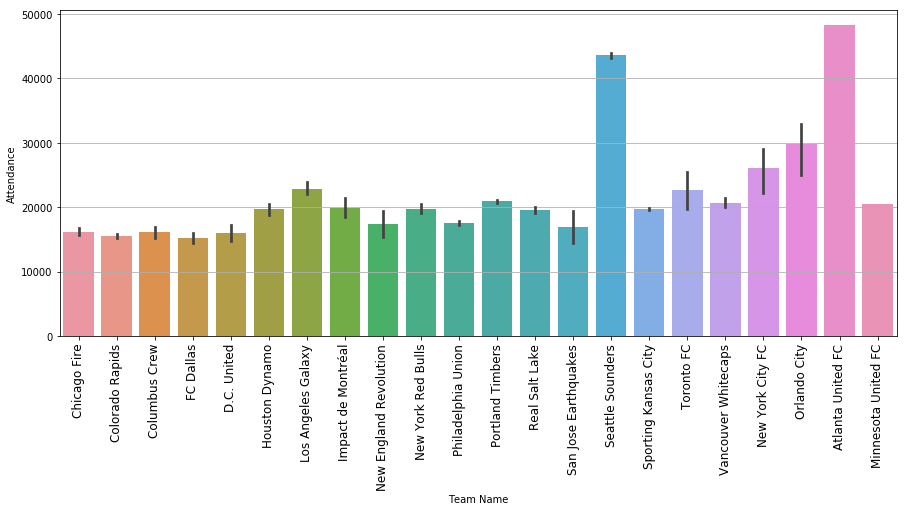

In [87]:
# plot the attendance data using seaborn library
plt.figure(figsize=(15,6))
sns.barplot(data=historical_attendence_data_1,x="Team Name",y="Attendance")
plt.xticks(fontsize=12,rotation=90)
plt.grid(axis="y")

In [75]:
# import the 2012 - 2017 performance data from MLS_Historical_Performance.xlsx
historical_performance_data_1= pd.read_excel("Resources/MLS_Historical_Performance.xlsx")
historical_performance_data_1.head()

,Pos,Team,Pld,W,L,D,Pts,Year
0,1,San Jose Earthquakes,34,19,6,9,66,2012
1,2,Sporting Kansas City,34,18,7,9,63,2012
2,3,D.C. United,34,17,10,7,58,2012
3,4,New York Red Bulls,34,16,9,9,57,2012
4,5,Real Salt Lake,34,17,11,6,57,2012


In [79]:
historical_performance_data = historical_performance_data_1.pivot(index="Team",columns="Year",values="Pts")
historical_performance_data

Year,2012,2013,2014,2015,2016,2017
Team,,,,,,
Atlanta United FC,NaN,NaN,NaN,NaN,NaN,55.0
Chicago Fire,57.0,49.0,36.0,30.0,31.0,55.0
Chivas USA,30.0,26.0,33.0,NaN,NaN,NaN
Colorado Rapids,37.0,51.0,32.0,37.0,58.0,33.0
Columbus Crew,52.0,41.0,52.0,53.0,36.0,54.0
D.C. United,58.0,16.0,59.0,51.0,46.0,32.0
FC Dallas,39.0,44.0,54.0,60.0,60.0,46.0
Houston Dynamo,53.0,51.0,39.0,42.0,34.0,50.0
Impact de Montréal,42.0,49.0,28.0,51.0,45.0,39.0


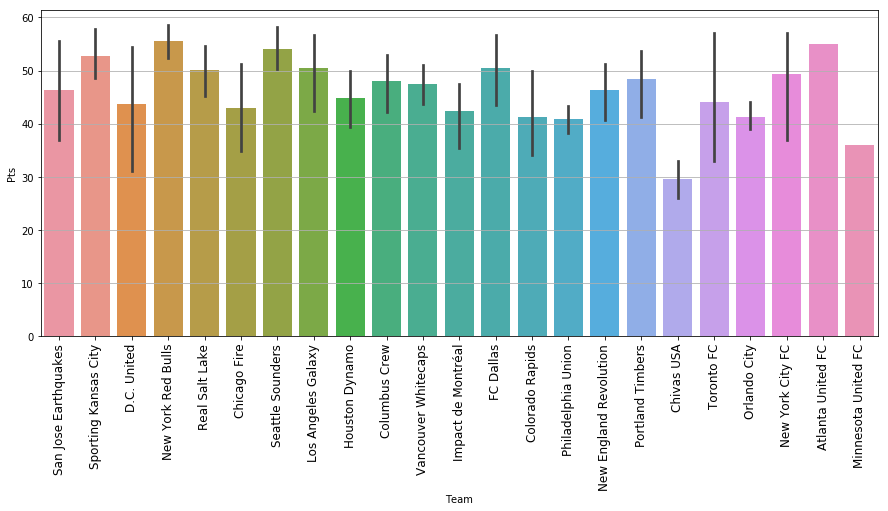

In [86]:
# plot the attendance data using seaborn library
plt.figure(figsize=(15,6))
sns.barplot(data=historical_performance_data_1,x="Team",y="Pts")
plt.xticks(fontsize=12,rotation=90)
plt.grid(axis="y")